In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\TAUFIQUE\\Desktop\\merged_dataset.csv')  # Double backslashes
print(df.head())


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\TAUFIQUE\Desktop\merged_dataset.csv')

# Display basic information
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None

First 5 Rows:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch



Missing Values:
Text        0
Language    0
dtype: int64


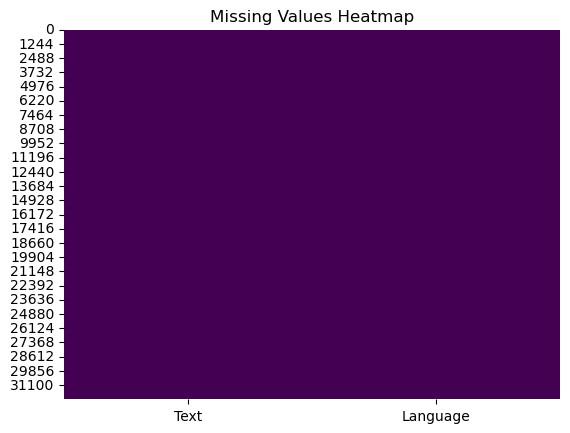

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [7]:
# Shape of the dataset
print("\nDataset Shape:", df.shape)

# Column data types
print("\nColumn Data Types:")
print(df.dtypes)

# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all'))  # Include all columns, including non-numeric



Dataset Shape: (32337, 2)

Column Data Types:
Text        object
Language    object
dtype: object

Statistical Summary:
                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [9]:
# Count unique values in each column
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"\nValue Counts for '{column}':")
        print(df[column].value_counts())



Value Counts for 'Text':
Text
haec commentatio automatice praeparata res astronomicas colligit excerptas e pagina [] sitús small-body database quem elaboraverunt nasa et jpl apud institutum technologiae californiense                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              48
இக்கோயில் முதன

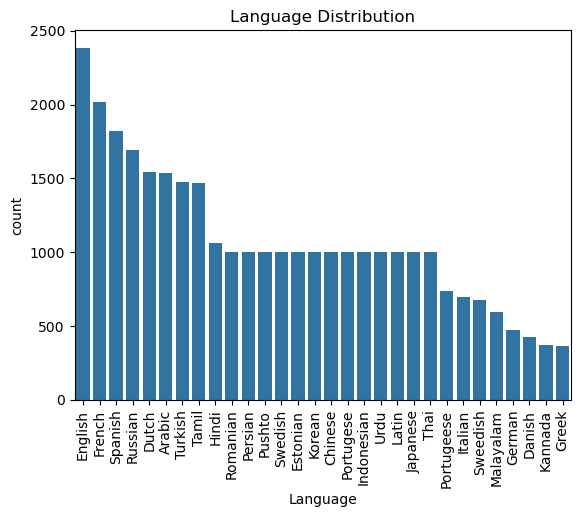

In [11]:

sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index)
plt.title('Language Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


In [19]:
import matplotlib.pyplot as plt

# Check for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

if len(numeric_cols) > 0:
    # Generate histograms only for numeric columns
    df[numeric_cols].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle('Distribution of Numeric Features', fontsize=16)
    plt.show()
else:
    print("No numeric columns found in the dataset.")


No numeric columns found in the dataset.


In [21]:
print(df.dtypes)


Text        object
Language    object
dtype: object


Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Romanian      1000
Persian       1000
Pushto        1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Thai          1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


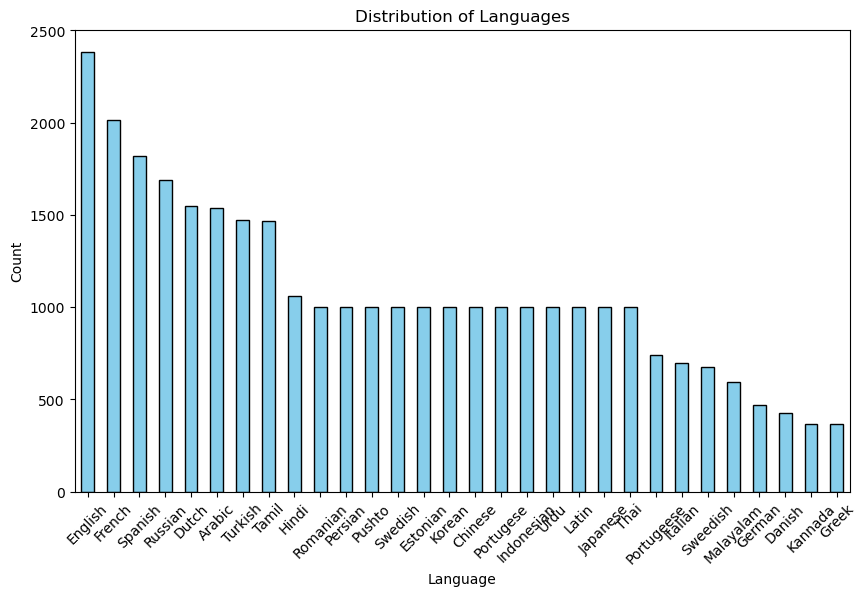

In [23]:
# Distribution of languages
print(df['Language'].value_counts())

# Plot bar chart for language distribution
df['Language'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


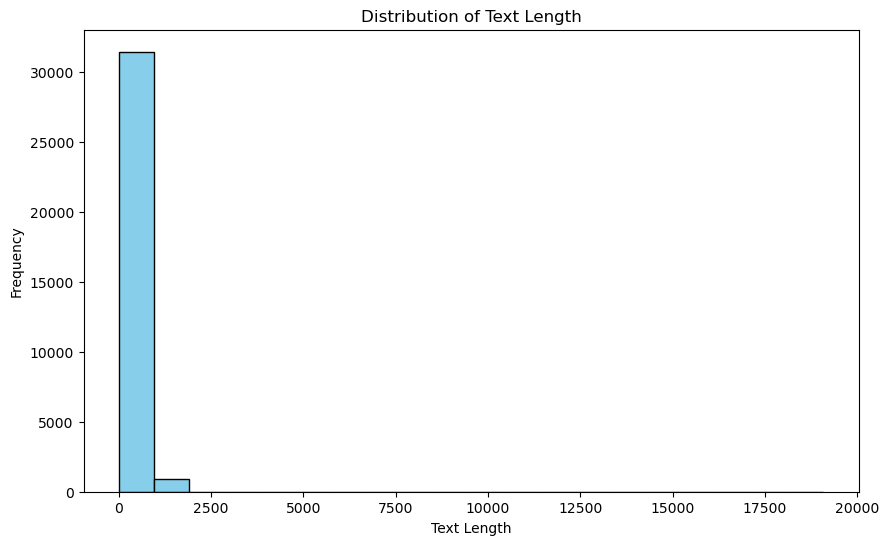

In [25]:
# Add  column for text length
df['Text_Length'] = df['Text'].apply(len)

# Plot a histogram for text length
df['Text_Length'].plot(kind='hist', bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [27]:
import re

# Remove special characters and convert to lowercase
df['Cleaned_Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())
print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0  klement gottwaldi surnukeha palsameeriti ning ...   
1  sebes joseph pereira thomas  på eng the jesuit...   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4  de spons behoort tot het geslacht haliclona en...   

                                        Cleaned_Text  
0  klement gottwaldi surnukeha palsameeriti ning ...  
1  sebes joseph pereira thomas  p eng the jesuits...  
2                      thanon charoen krung           
3                                                     
4  de spons behoort tot het geslacht haliclona en...  


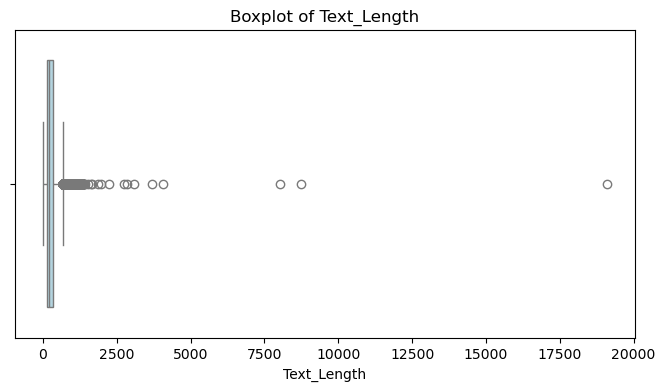

In [31]:
# Boxplot for numeric columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.show()


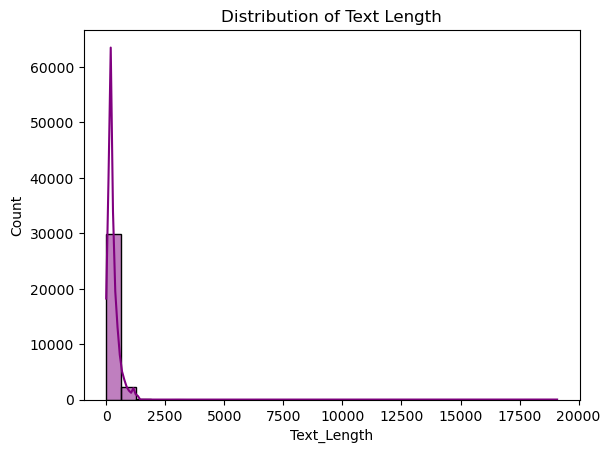

In [33]:
# Add a column for text length
df['Text_Length'] = df['Text'].apply(len)

# Plot distribution of text length
sns.histplot(df['Text_Length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Text Length')
plt.show()


In [35]:
#Datacleaning

import pandas as pd
import re

# Load the dataset (replace with your file path)
df = pd.read_csv('C:/Users/TAUFIQUE/Desktop/merged_dataset.csv')

# Define a cleaning function using regex
def clean_text(text):
    # Remove non-alphanumeric characters (excluding spaces)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numeric digits
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# View the first few rows to confirm the cleaning
print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0  klement gottwaldi surnukeha palsameeriti ning ...   
1  sebes joseph pereira thomas  på eng the jesuit...   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4  de spons behoort tot het geslacht haliclona en...   

                                        Cleaned_Text  
0  klement gottwaldi surnukeha palsameeriti ning ...  
1  sebes joseph pereira thomas på eng the jesuits...  
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...  
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...  
4  de spons behoort tot het geslacht haliclona en...  


In [39]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply to the Cleaned_Text column
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_non_ascii)


In [41]:
from nltk.corpus import stopwords

# Download stopwords if not already available
import nltk
nltk.download('stopwords')

# Define stopwords set
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TAUFIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [43]:
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already available
nltk.download('stopwords')

# Define stopwords set
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'Cleaned_Text' column
if 'Cleaned_Text' in df.columns:
    df['Cleaned_Text'] = df['Cleaned_Text'].apply(
        lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
    )
    print("Stopwords removed successfully!")
else:
    print("'Cleaned_Text' column not found. Please check the dataset.")


Stopwords removed successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TAUFIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df['Cleaned_Text'] = df['Cleaned_Text'].fillna('')


Most Common Words Post-Cleaning:
de: 24227
en: 7490
la: 7457
que: 3678
et: 3592
r: 2989
e: 2960
le: 2812
el: 2674
un: 2544
van: 2333
se: 2281
n: 2192
est: 2137
het: 1938
di: 1876
och: 1873
da: 1836
du: 1789
dan: 1763


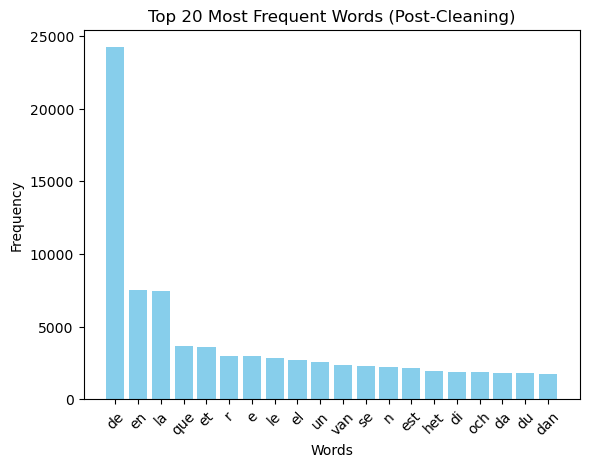

In [47]:
# Word Frequency Analysis Post-Cleaning

from collections import Counter

# Flatten the cleaned text into a single list of words
all_words = ' '.join(df['Cleaned_Text']).split()

# Get word frequencies
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Display most frequent words
print("Most Common Words Post-Cleaning:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Plot the word frequencies
import matplotlib.pyplot as plt

words, counts = zip(*most_common_words)
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words (Post-Cleaning)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


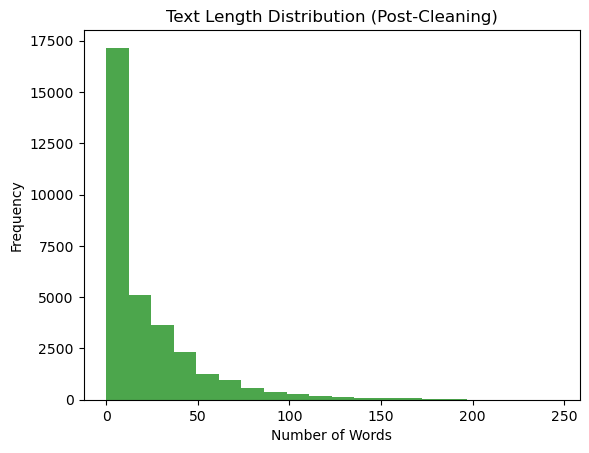

In [49]:
# Text Length Distribution

df['Text_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

# Plot text length distribution
plt.hist(df['Text_Length'], bins=20, color='green', alpha=0.7)
plt.title('Text Length Distribution (Post-Cleaning)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [56]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


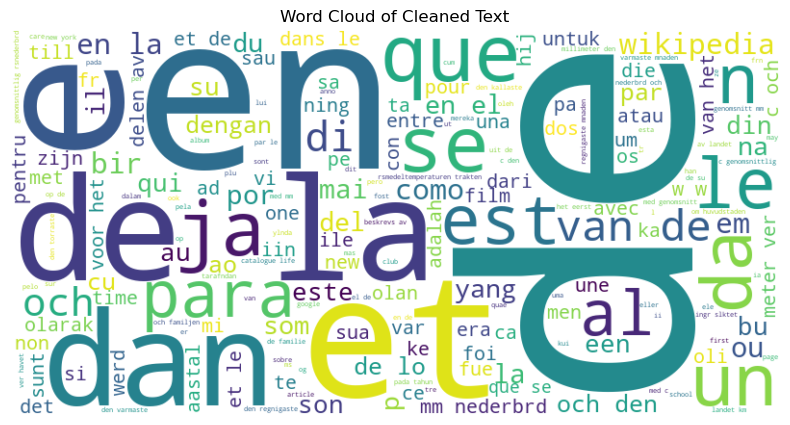

In [58]:
from wordcloud import WordCloud

# Create a word cloud from the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Text']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

def generate_ngrams(corpus, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    ngrams = vectorizer.transform(corpus)
    sum_ngrams = ngrams.sum(axis=0)
    ngram_counts = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngram_counts, key=lambda x: x[1], reverse=True)[:top_n]


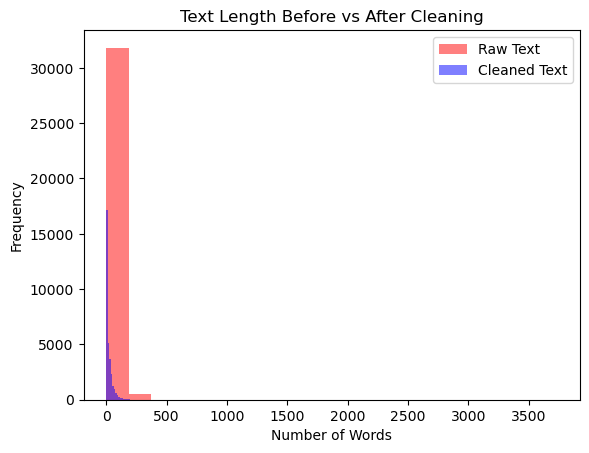

In [64]:
# Calculate raw text length
df['Raw_Text_Length'] = df['Text'].apply(lambda x: len(x.split()))

# Compare raw and cleaned text lengths
plt.hist(df['Raw_Text_Length'], bins=20, color='red', alpha=0.5, label='Raw Text')
plt.hist(df['Text_Length'], bins=20, color='blue', alpha=0.5, label='Cleaned Text')
plt.title('Text Length Before vs After Cleaning')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import nltk

# Load dataset from the given path
df = pd.read_csv(r'C:\Users\TAUFIQUE\Desktop\merged_dataset.csv')

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Feature 1: Text-based Features
if 'Text' in df.columns:
    df['text_length'] = df['Text'].apply(len)
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['avg_word_length'] = df['Text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
else:
    print("The 'Text' column does not exist in the dataset!")

# Feature 2: Remove Stopwords from text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
if 'Text' in df.columns:
    df['cleaned_text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
else:
    print("The 'Text' column does not exist in the dataset!")

# Feature 3: TF-IDF Vectorization
if 'Text' in df.columns:
    tfidf = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
    df = pd.concat([df, tfidf_df], axis=1)
else:
    print("The 'Text' column does not exist in the dataset!")

# Feature 4: Date-based Features (Check if 'Date' exists in columns)
if 'Date' in df.columns:
    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' column to datetime
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
else:
    print("The 'Date' column does not exist in the dataset!")

# Feature 5: Scaling Numerical Features
# Replace 'price' and 'quantity' with the actual column names from the dataset
numerical_columns = ['price', 'quantity']  # Replace with your actual numerical columns
if all(col in df.columns for col in numerical_columns):  # Ensure the columns exist
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
else:
    print(f"Columns {numerical_columns} do not exist in the dataset!")

# Handle missing values (e.g., fill missing values in 'price' with the mean)
if 'price' in df.columns:
    df['price'].fillna(df['price'].mean(), inplace=True)

# Drop original 'Text' and 'Date' columns if not needed, but only if they exist
if 'Text' in df.columns:
    df.drop(columns=['Text'], inplace=True)
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)

# Check the final dataset
print(df.head())



D:\RetailRevive\envs\lang-detector\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\RetailRevive\envs\lang-detector\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TAUFIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The 'Date' column does not exist in the dataset!
Columns ['price', 'quantity'] do not exist in the dataset!
   Language  text_length  word_count  avg_word_length  \
0  Estonian          339          45         6.533333   
1   Swedish          171          27         5.185185   
2      Thai          251          14        17.000000   
3     Tamil          305          28         9.857143   
4     Dutch          176          28         5.285714   

                                        cleaned_text   10   22  aan    aastal  \
0  klement gottwaldi surnukeha palsameeriti ning ...  0.0  0.0  0.0  0.330248   
1  sebes joseph pereira thomas på eng jesuits sin...  0.0  0.0  0.0  0.000000   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...  0.0  0.0  0.0  0.000000   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...  0.0  0.0  0.0  0.000000   
4  de spons behoort tot het geslacht haliclona en...  0.0  0.0  0.0  0.000000   

    ab  ...   대한   된다   또한   위해   이후   있는   있다  자신의   한다   함께 

In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\TAUFIQUE\Desktop\merged_dataset.csv')


In [5]:
print(df.head())


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [9]:
# Set 'Text' as the feature and 'Language' as the target
if 'Text' in df.columns and 'Language' in df.columns:
    X = df['Text']  # Features
    y = df['Language']  # Target
    print("Features and target variables created successfully.")
else:
    print("The required columns 'Text' or 'Language' do not exist in the dataset!")


Features and target variables created successfully.


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf.fit_transform(X)  # Transformed text data


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       291
     Chinese       0.71      0.20      0.32       205
      Danish       0.95      0.73      0.83        71
       Dutch       1.00      0.95      0.97       318
     English       0.91      0.97      0.94       482
    Estonian       0.98      0.94      0.96       193
      French       0.96      0.93      0.95       414
      German       0.92      0.85      0.88       105
       Greek       1.00      0.75      0.86        72
       Hindi       1.00      0.99      0.99       216
  Indonesian       1.00      0.98      0.99       214
     Italian       0.96      0.83      0.89       142
    Japanese       0.25      0.88      0.39       184
     Kannada       1.00      0.39      0.56        74
      Korean       0.99      0.68      0.81       171
       Latin       0.93      0.95      0.94       226
   Malayalam       1.00      0.76      0.86        98
     Persian       1.00    

In [13]:
from sklearn.model_selection import train_test_split

# Assuming `X` contains features and `y` contains the target labels
X = df.drop(columns=['Language'])  # Replace 'Language' with your target column name
y = df['Language']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully!")


Data split successfully!


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is already loaded with your data, and the target column is 'Language'
X = df['Text']  # Assuming 'Text' contains the actual text data
y = df['Language']  # Assuming 'Language' is the target column

# Step 1: Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(X)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Train a machine learning model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       291
     Chinese       0.71      0.20      0.32       205
      Danish       0.95      0.73      0.83        71
       Dutch       1.00      0.95      0.97       318
     English       0.91      0.97      0.94       482
    Estonian       0.98      0.94      0.96       193
      French       0.96      0.93      0.95       414
      German       0.92      0.85      0.88       105
       Greek       1.00      0.75      0.86        72
       Hindi       1.00      0.99      0.99       216
  Indonesian       1.00      0.98      0.99       214
     Italian       0.96      0.83      0.89       142
    Japanese       0.25      0.88      0.39       184
     Kannada       1.00      0.39      0.56        74
      Korean       0.99      0.68      0.81       171
       Latin       0.93      0.95      0.94       226
   Malayalam       1.00      0.76      0.86        98
    

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Use double backslashes to avoid the unicode error
df = pd.read_csv('C:\\Users\\TAUFIQUE\\Desktop\\merged_dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Assuming df is already loaded with your data, and the target column is 'Language'
X = df['Text']  # Assuming 'Text' contains the actual text data
y = df['Language']  # Assuming 'Language' is the target column

# Step 1: Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(X)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Train a machine learning model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       291
     Chinese       0.71      0.20      0.32       205
      Danish       0.95      0.73      0.83        71
       Dutch       1.00      0.95      0.97       318
     English       0.91      0.97      0.94       482
    Estonian       0.98      0.94      0.96       193
      French       0.96      0.93      0.95       414
      German       0.92      0.85      0.88       105
       Greek       1.00      0.75      0.86        72
       Hindi       1.00      0.99      0.99       216
  In

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load your dataset (Ensure that the dataset is loaded properly)
df = pd.read_csv('C:\\Users\\TAUFIQUE\\Desktop\\merged_dataset.csv')

# Step 2: Preprocessing - Handling missing values and scaling features
# Assuming 'Language' is the target column
X = df.drop('Language', axis=1)  # Features
y = df['Language']  # Target

# Handle missing values if any
X = X.fillna(X.mean())  # Impute missing values with mean of the column

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Step 5: Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Improved Random Forest Accuracy:", accuracy)

# Step 7: Cross-validation score to confirm the performance
cross_val_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5)
print("Cross-Validation Mean Accuracy:", cross_val_scores.mean())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('C:/Users/TAUFIQUE/Desktop/merged_dataset.csv')

# Check the first few rows of the dataset to ensure correct loading
print("Dataset Preview:")
print(df.head())

# Assuming the target column is named 'Language'
# Encode the target column ('Language') using LabelEncoder
le = LabelEncoder()
df['Language'] = le.fit_transform(df['Language'])

# Features (X) and target (y)
X = df.drop('Language', axis=1)  # Drop the target column
y = df['Language']  # The target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearchCV to improve accuracy
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 1: GridSearchCV for hyperparameter tuning
try:
    print("Starting GridSearchCV...")
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    print("GridSearchCV completed.")
    
    # Step 2: Get the best model from grid search
    best_rf_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")

    # Step 3: Train the best model on training data
    print("Training the best Random Forest model...")
    best_rf_model.fit(X_train, y_train)

    # Step 4: Predict and evaluate the model on the test data
    print("Making predictions on the test set...")
    y_pred = best_rf_model.predict(X_test)

    # Step 5: Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Improved Random Forest Accuracy: {accuracy}")
    
except Exception as e:
    print(f"An error occurred: {e}")


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (update the path if needed)
file_path = r'C:\Users\TAUFIQUE\Desktop\merged_dataset.csv'  # Use raw string or double backslashes
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()  # Stop execution if dataset is not loaded

# Check the first few rows to confirm correct loading
print("Dataset Preview:")
print(df.head())

# Ensure the 'Language' column exists
if 'Language' not in df.columns:
    print("Error: 'Language' column is missing!")
    exit()

# Encode the 'Language' column using LabelEncoder
le = LabelEncoder()
df['Language'] = le.fit_transform(df['Language'])

# Features (X) and target (y)
X = df.drop('Language', axis=1)  # Drop the target column
y = df['Language']  # The target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
print("Training the Random Forest model...")
try:
    rf_model.fit(X_train, y_train)
    print("Model trained successfully.")
except Exception as e:
    print(f"Error during model training: {e}")
    exit()

# Make predictions
print("Making predictions on the test set...")
try:
    y_pred = rf_model.predict(X_test)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Dataset loaded successfully.
Dataset Preview:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
Training the Random Forest model...
Error during model training: could not convert string to float: '.Hepimiz İngilizcede daha akıcı olmanın hızlı yollarını arıyoruz, biliyorum ne olduğunu anlıyorum, beynimizi çevreleyen sadece birkaç kelime var ve tüm bu konuşmayı harika, harika havalı veya destansı kullanarak yapmamız gerekiyor, peki ya biz günlük yaşamınızda kullanabileceğiniz bazı akıllı yeni İngilizce kelimeleri öğrenin ve kelime dağarcığınızı dakikalar içinde geliştirin.'
Making predictions on the test set...
Error during prediction: 'RandomForestClassifier' objec

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset (update the path if needed)
file_path = r'C:\Users\TAUFIQUE\Desktop\merged_dataset.csv'  # Use raw string or double backslashes
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit() 
# Check the first few rows to confirm correct loading
print("Dataset Preview:")
print(df.head())

# Ensure the 'Language' column exists
if 'Language' not in df.columns:
    print("Error: 'Language' column is missing!")
    exit()

# Encode the 'Language' column using LabelEncoder
le = LabelEncoder()
df['Language'] = le.fit_transform(df['Language'])

# Features (X) and target (y)
X = df['Text']  # Text column
y = df['Language']  # The target column

vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features to suit your needs
X_tfidf = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
print("Training the Random Forest model...")
try:
    rf_model.fit(X_train, y_train)
    print("Model trained successfully.")
except Exception as e:
    print(f"Error during model training: {e}")
    exit()

# Make predictions
print("Making predictions on the test set...")
try:
    y_pred = rf_model.predict(X_test)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Dataset loaded successfully.
Dataset Preview:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
Training the Random Forest model...
Model trained successfully.
Making predictions on the test set...
Predictions made successfully.
Random Forest Accuracy: 0.9194495980210265
